In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('overlap.csv', header=None)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def conv_index_to_bins(index):
    """Calculate bins to contain the index values.
    The start and end bin boundaries are linearly extrapolated from 
    the two first and last values. The middle bin boundaries are 
    midpoints.

    Example 1: [0, 1] -> [-0.5, 0.5, 1.5]
    Example 2: [0, 1, 4] -> [-0.5, 0.5, 2.5, 5.5]
    Example 3: [4, 1, 0] -> [5.5, 2.5, 0.5, -0.5]"""
    assert index.is_monotonic_increasing or index.is_monotonic_decreasing

    # the beginning and end values are guessed from first and last two
    start = index[0] - (index[1]-index[0])/2
    end = index[-1] + (index[-1]-index[-2])/2

    # the middle values are the midpoints
    middle = pd.DataFrame({'m1': index[:-1], 'p1': index[1:]})
    middle = middle['m1'] + (middle['p1']-middle['m1'])/2

    if isinstance(index, pd.DatetimeIndex):
        idx = pd.DatetimeIndex(middle).union([start,end])
    elif isinstance(index, (pd.Float64Index,pd.RangeIndex,pd.Int64Index)):
        idx = pd.Float64Index(middle).union([start,end])
    else:
        print('Warning: guessing what to do with index type %s' % 
              type(index))
        idx = pd.Float64Index(middle).union([start,end])

    return idx.sort_values(ascending=index.is_monotonic_increasing)

def calc_df_mesh(df):
    """Calculate the two-dimensional bins to hold the index and 
    column values."""
    return np.meshgrid(conv_index_to_bins(df.index),
                       conv_index_to_bins(df.columns))

def heatmap(df):
    """Plot a heatmap of the dataframe values using the index and 
    columns"""
    X,Y = calc_df_mesh(df)
    c = plt.pcolormesh(X, Y, df.values.T)
    plt.colorbar(c)

In [26]:
vc = df[3].value_counts().reset_index()

0      0.835938
1      0.984127
2      0.628866
3      0.454545
4      1.000000
         ...   
346    0.010638
347    1.000000
348    0.622642
349    1.000000
350    1.000000
Name: 3, Length: 351, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef828fc610>,
      dtype=object)

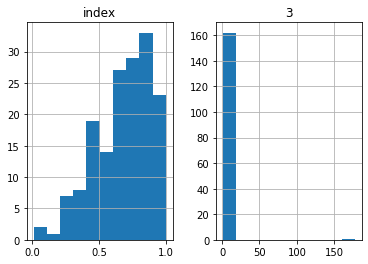

In [34]:
vc.hist(bins=10)

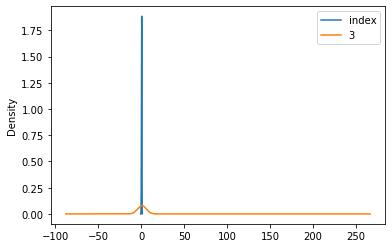

In [38]:
vc.plot.density()

[0.0106383  0.06122449 0.14285714 0.2231405  0.24744296 0.2625
 0.26515152 0.29850746 0.3        0.30263158 0.31666667 0.33653846
 0.34545455 0.35616438 0.37113402 0.38541667 0.39361702 0.40540541
 0.41025641 0.41538462 0.41573034 0.42028986 0.42857143 0.44444444
 0.45205479 0.45454545 0.45454545 0.45555556 0.45945946 0.47560976
 0.47619048 0.48484848 0.48648649 0.49253731 0.4939759  0.49473684
 0.49606299 0.5        0.5        0.5        0.50746269 0.51111111
 0.52307692 0.53       0.53543307 0.53676471 0.53703704 0.54054054
 0.54117647 0.54878049 0.55384615 0.57954545 0.59223301 0.59836066
 0.60952381 0.61038961 0.61320755 0.62264151 0.62589928 0.62745098
 0.62886598 0.6328125  0.64347826 0.64615385 0.64705882 0.64705882
 0.64948454 0.65277778 0.65482234 0.65517241 0.65625    0.65740741
 0.66666667 0.66666667 0.66666667 0.67010309 0.67142857 0.6779661
 0.68041237 0.68333333 0.68493151 0.69072165 0.69230769 0.70114943
 0.70434783 0.70807453 0.72340426 0.72527473 0.7260274  0.72857143


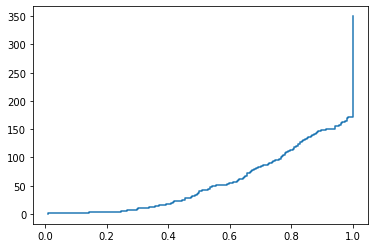

In [45]:
sorted_data = np.sort(df[3])  # Or data.sort(), if data can be modified

print(sorted_data)
# Cumulative counts:
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1
# plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

plt.show()